In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


Populating the interactive namespace from numpy and matplotlib


***
# Part 1: Linear Regression
### Purpose of linear regression

<p> Given a dataset $X$ and $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $X_i$ without a $Y$ value.  </li>
  <li> Model the <b>strength of the relationship</b> between each dependent variable $X_i$ and $Y$</li>
    <ul>
      <li> Sometimes not all $X_i$ will have a relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to determine $Y$ </li>
    </ul>
   <li>Linear regression is used in so many applications that I won't warrant this with examples. It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

[Linear Regression] is a model that establishes the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is linearly related to the dependent variable $Y$.  

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. This is the simplest form of linear regression (one variable), we'll call this the simple model. 

* $\beta_0$ is the intercept of the linear model

* Multiple linear regression is when you have more than one independent variable
    * $X_1$, $X_2$, $X_3$, $\ldots$

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is one of the most common methods

    
#### Estimating $\hat\beta$: Least squares
***
[Least squares] is a method that can estimate the coefficients of a linear model by minimizing the difference between the following: 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

where $N$ is the number of observations.  

* We will not go into the mathematical details, but the least squares estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ minimize the sum of the squared residuals $r_i = y_i - (\beta_0 + \beta_1 x_i)$ in the model (i.e. makes the difference between the observed $y_i$ and linear model $\beta_0 + \beta_1 x_i$ as small as possible). 

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 


**Note**: The "hat" represents an estimatation of the coefficient.  

***
# Part 2: Boston Housing Data Set

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 
* **Dataset attributes descritption**:
        - **CRIM**     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
 

## Load the Boston Housing data.  

In [2]:
boston=pd.read_csv('/content/BostonHousing.csv')
print (boston.shape)
boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

## EDA and statistical summary
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [3]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatter plots
***

Some scatter plots for three variables: 'CRIM', 'RM' and 'PTRATIO'. 



Text(0.5, 1.0, 'Relationship between RM and Price')

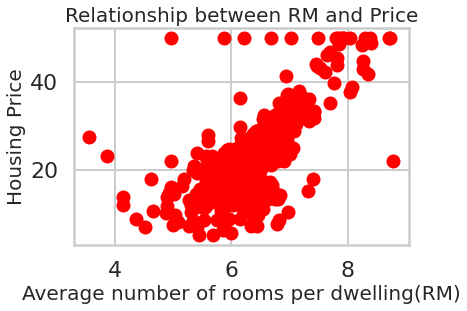

In [4]:
#your turn: scatter plot between *RM* and *PRICE*

plt.scatter(boston.RM, boston.PRICE,color='red')
plt.xlabel("Average number of rooms per dwelling(RM)",fontsize=20)
plt.ylabel("Housing Price",fontsize=20)
plt.title("Relationship between RM and Price",fontsize=20)

#Positive Linear relation: Increase of RM causes Housing price to increase.

# Histogram plot

Histograms are a useful way to visually summarize the statistical properties of numeric variables. They can give you an idea of the mean and the spread of the variables as well as outliers.

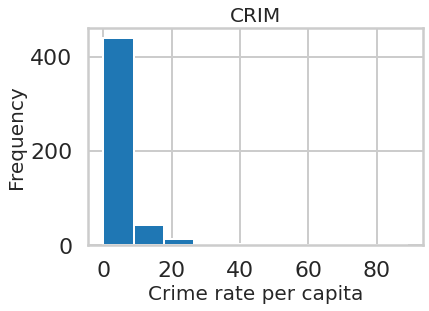

In [5]:
plt.hist(boston.CRIM)
plt.title("CRIM",fontsize=20)
plt.xlabel("Crime rate per capita",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

## Linear regression with  Boston housing data example
***

Here, 

$Y$ = boston housing prices (also called "target" data in python)

and

$X$ = all the other features (or independent variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `sklearn`


In [6]:
from sklearn.linear_model import LinearRegression
X = boston.drop('PRICE', axis = 1)

Y=boston.PRICE
print (Y)

# This creates a LinearRegression object
lm = LinearRegression()

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [7]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, Y)

LinearRegression()

**Your turn:** How would you change the model to not fit an intercept term? Would you recommend not having an intercept?


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  



In [8]:
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.45948838508978


In [9]:
print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [10]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

# Predicted values

In [12]:
predicted=lm.predict(X)
print (predicted)

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

# Model visualization

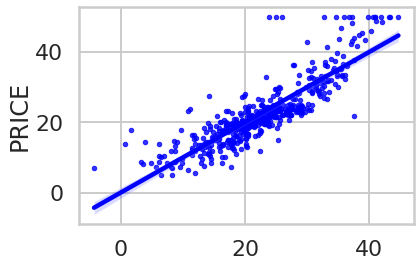

In [13]:
sns.regplot(x=predicted, y=boston['PRICE'], data=boston, fit_reg=True,color='blue',scatter_kws={'s':20})

# Try to fit a linear regression model uaing PTRATIO and housing price

In [28]:
lm1 = LinearRegression()
lm1.fit(X[['CRIM',]], boston.PRICE)

LinearRegression()

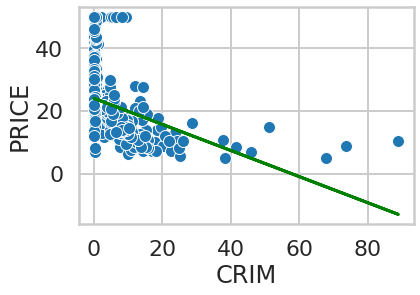

In [29]:
sns.scatterplot(x=boston.CRIM, y=boston.PRICE, data=boston)
#sns.scatterplot(x=boston.PTRATIO, y=predicted, data=boston)
#sns.scatterplot(x=boston.PIRATIO, y=predicted, data=boston)
#sns.lineplot(x='alcohol', y='pred_lr', data=df_crashes, color='orange');

plt.plot(boston.CRIM, lm1.predict(X[['CRIM']]), color='green', linewidth=3)

# Part 3: Model build by training and Test Data set splitting 

### Purpose of splitting data into Training/testing sets
***
<p> Let's stick to the linear regression example: </p>
<ul>
  <li> We built our model with the requirement that the model fit the data well. </li>
  <li> As a side-effect, the model will fit <b>THIS</b> dataset well. What about new data? </li>
    <ul>
      <li> We wanted the model for predictions, right?</li>
    </ul>
  <li> One simple solution, leave out some data (for <b>testing</b>) and <b>train</b> the model on the rest </li>
  <li> This also leads directly to the idea of cross-validation, next section. </li>  
</ul>
</div>

***

One way of doing this is you can create training and testing data sets manually. 

Another way, is to split the data into random train and test subsets using the function `train_test_split` in `sklearn.cross_validation`. 

In [22]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.20, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [32]:
print (Y_test)

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
Name: PRICE, Length: 102, dtype: float64


Let's build a linear regression model using our new training data sets. 

* Fit a linear regression model to the training set
* Predict the output on the test set

In [23]:

from sklearn import linear_model
# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regrfit= regr2.fit(X_train, Y_train)

#Predicting the target variable from test.
Y_pred = regr2.predict(X_test)

# The coefficients
print('Coefficients: \n', regr2.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((Y_pred - Y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(X_test, Y_test))


Coefficients: 
 [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]
Mean squared error: 20.87
Variance score: 0.73


#### Residual plots

Text(0, 0.5, 'Residuals')

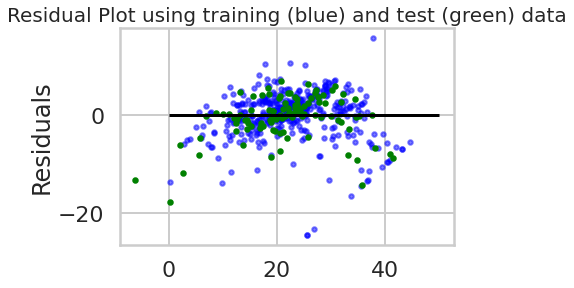

In [27]:
plt.scatter(regr2.predict(X_train), regr2.predict(X_train) - Y_train, c='b', s=20, alpha=0.5)
plt.scatter(regr2.predict(X_test), regr2.predict(X_test) - Y_test, c='g', s=20)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data',fontsize=20)
plt.ylabel('Residuals')

### Model evaluation on test data in terms of R^2 (co-efficient of the determination), MSE (mean square error) and RMSE (root mean square error).

In [25]:
# Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('R^2:',r2_score(Y_test, Y_pred))
print('MSE:',mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test, Y_pred)))

R^2: 0.7334492147453086
MSE: 20.869292183770735
RMSE: 4.5682920423032


# **Regression model's score calculation**

 **.score()** function is used to correctly calculate the difference between the model's predictions and reality to measure the quality of a model.

In [37]:
regr2.score(X_test, Y_test)

0.7334492147453086

# **Residuals:**
In this step, we will calculate the residuals by subtracting predicted values from actual values. As we have splitted the dataset into training to fit and testing for validation purpose, so we will calculate the residuals by subtrating predicted values (Y_predict) from actual sets (Y_test).

In [45]:
Y_residuals=(Y_test- Y_pred)
print (Y_residuals**2)

226     0.001360
292    18.015368
90     19.942801
373    66.083790
273     0.010035
         ...    
349    21.968382
212     0.000027
156     0.008715
480     0.940727
248    10.895631
Name: PRICE, Length: 102, dtype: float64


### Residual sum of squares

Let's calculate the residual sum of squares 

$$ RSS = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - \hat{y})^2 $$

finally, add the suares of residuals residuals up to calculate the **Residual Sum of Squares (RSS)**:

In [46]:
RSS=(Y_residuals**2).sum()
print(RSS)

2128.667802744615


### We have already calculated the variation of the model's prediction. Now we calculate the variation of the real data by comparing each house price value to the average:

Calculation of the mean

In [48]:
print (Y_test.mean())

22.081372549019605


In [49]:
print (Y_test-Y_test.mean())

226    15.518627
292     5.818627
90      0.518627
373    -8.281373
273    13.118627
         ...    
349     4.518627
212     0.318627
156    -8.981373
480     0.918627
248     2.418627
Name: PRICE, Length: 102, dtype: float64


In [51]:
real_residual=(Y_test-Y_test.mean())
print (real_residual**2)

226    240.827798
292     33.856425
90       0.268974
373     68.581131
273    172.098386
          ...    
349     20.417994
212      0.101523
156     80.665053
480      0.843876
248      5.849759
Name: PRICE, Length: 102, dtype: float64


And we add up the residual values to get the **Total Sum of Squares (TSS):**

Let's calculate the total sum of squares 

$$ TSS = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - \overline{y})^2 $$

In [54]:
TSS=(real_residual**2).sum()
print(TSS)

7985.974607843138


In [55]:
print (RSS/TSS)

0.26655078525469145


**Calculatation the coefficient of determination** :
To calculate the goodness of the model, we need to subtract the ratio RSS/TSS to 1:


$$ R^2 = 1-\frac{RSS}{TSS} $$

In [57]:
CDR=1-(RSS/TSS)
print (CDR)

0.7334492147453086


 we can say that, The **coefficient of the determination (R^2)** of our model is 73.34% .

# Assignments:
Build a linear regression model, to **predict the car price** based on some factors.
<p>
<li> Gather the data</li>
<li> Start the pre-processing step </li>
<li> Scaling the data if required </li>
<li> Split the data into training (to fit te model) and testing (to validate)</li>.
<li> Visualize the model by using single independent variable with the car price.</li>
<li> Calculate the prediction.</li>
<li> Calculate the <b> RSS</b>, <b>TSS</b> and <b>the coefficient of the determination(R^2) </b> </li>
</p>






### Loading the car price prediction data

In [61]:
car_data=pd.read_csv('/content/CarPrice_Assignment (1).csv')
#print (car_data)
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
